In [44]:
import gzip
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("usa_00005.csv.gz", compression="gzip")

In [35]:
new_df = df[["STATEFIP", "AGE", "EMPSTAT", "EDUC"]]

In [9]:
codebook_txt = open("usa_00005.cbk.txt", 'r')

# Load all of the lines of txt and put them into a list
# When looking at the list of all lines in another cell we can start to find the places of the indexes necessary

all_lines = []
for line in codebook_txt.readlines():
    all_lines.append(line)

# Find the indexes in all_lines for the state decoder
index_1 = all_lines.index("01\t\tAlabama\n")
index_2 = all_lines.index("56\t\tWyoming\n")

# Find the indexes in all_lines for the educational attainment decoder
index_3 = all_lines.index("00\t\tN/A or no schooling\n")
index_4 = all_lines.index("11\t\t5+ years of college\n")

# Find the indexes in all_lines for the employment status decoder
index_6 = all_lines.index("3\t\tNot in labor force\n")
index_5 = index_6 - 3

In [10]:
state_decoder = {}
for line in all_lines[index_1:index_2+1]:
    line_split = line.split("\t\t")
    line_split[0] = int(line_split[0])
    line_split[1] = line_split[1][:-1]
    state_decoder[line_split[0]] = line_split[1]

In [12]:
education_decoder = {}
for line in all_lines[index_3:index_4+1]:
    line_split = line.split("\t\t")
    line_split[0] = int(line_split[0])
    line_split[1] = line_split[1][:-1]
    education_decoder[line_split[0]] = line_split[1]

In [13]:
employment_decoder = {}
for line in all_lines[index_5:index_6+1]:
    line_split = line.split("\t\t")
    line_split[0] = int(line_split[0])
    line_split[1] = line_split[1][:-1]
    employment_decoder[line_split[0]] = line_split[1]

In [36]:
# Apply the three maps to replace the values in the dataframe
new_df["STATEFIP"].replace(state_decoder, inplace = True) 
new_df["EDUC"].replace(education_decoder, inplace = True)
new_df["EMPSTAT"].replace(employment_decoder, inplace = True)

In [37]:
# Filter for individuals who are older than 25
age_18 = new_df[new_df.AGE > 17]

In [38]:
# Create a map that will create two groups for education: those who have attended at least one year of college
# and those who have not

education_list = age_18["EDUC"].unique()

some_college_map = {}

for i in education_list:
    if "college" in i:
        some_college_map[i] = "Some college"
    else:
        some_college_map[i] = "No college"

In [39]:
# Create the two groups based on the map on the pandas dataframe 

age_18["EDUC"].replace(some_college_map, inplace = True)

In [40]:
age_18

,STATEFIP,AGE,EMPSTAT,EDUC
0,Alabama,84,Not in labor force,Some college
1,Alabama,84,Not in labor force,Some college
2,Alabama,78,Employed,Some college
3,Alabama,46,Employed,Some college
4,Alabama,52,Not in labor force,No college
...,...,...,...,...
3156482,Wyoming,74,Not in labor force,Some college
3156483,Wyoming,71,Not in labor force,No college
3156484,Wyoming,70,Not in labor force,Some college
3156485,Wyoming,31,Employed,Some college


In [41]:
def get_proportions_of_series(pd_series):
    proportion_counts = pd_series.value_counts(normalize=True)
    proportions_dictionary = proportion_counts.to_dict()
    return proportions_dictionary

In [42]:
state_list = age_18["STATEFIP"].unique()

column_names = ["State", 
                 "Proportion Some College", 
                 "Proportion No College", 
                 "Proportion Not In Labor Force",
                 "Proportion Employed",
                 "Proportion Unemployed"]

new_ipums_df = pd.DataFrame(columns = column_names)

for state in state_list:
    
    prop_df = age_18[age_18.STATEFIP == state]
    college_proportions = get_proportions_of_series(prop_df["EDUC"])
    employment_proportions = get_proportions_of_series(prop_df["EMPSTAT"])
    
    state_proportions_dictionary = {}
    
    state_proportions_dictionary["State"] = state
    state_proportions_dictionary["Proportion Some College"] = college_proportions["Some college"]
    state_proportions_dictionary["Proportion No College"] = college_proportions["No college"]
    state_proportions_dictionary["Proportion Not In Labor Force"] = employment_proportions["Not in labor force"]
    state_proportions_dictionary["Proportion Employed"] = employment_proportions["Employed"]
    state_proportions_dictionary["Proportion Unemployed"] = employment_proportions["Unemployed"]
    
    new_ipums_df = new_ipums_df.append(state_proportions_dictionary, ignore_index=True)

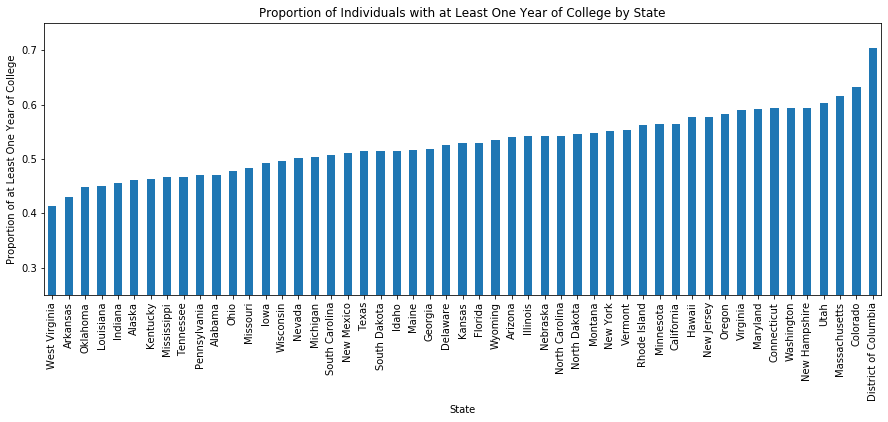

In [49]:
new_ipums_df.sort_values("Proportion Some College").plot(kind = 'bar', x="State", y="Proportion Some College", 
                                                                  figsize=(15,5), legend = False, 
                                                                  ylim = (.25, .75), 
                                                                  title = "Proportion of Individuals with at Least One Year of College by State")
plt.xlabel("State")
plt.ylabel("Proportion of at Least One Year of College")
plt.show()

In [53]:
new_ipums_df.sort_values("Proportion Unemployed").plot(kind = 'bar', x="State", y="Proportion Unemployed", 
                                                                figsize=(15,5), legend = False, 
                                                                ylim = (0.01, 0.08), 
                                                                title = "Unemployment Rate by State for the Year 2016")
plt.xlabel("State")
plt.ylabel("Unemployment Rate")
plt.show()

KeyError: 'Proportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion UnemployedProportion Unemployed'